#####このノートブックは、Pythonのsemopyパッケージを使って構造方程式モデリング（SEM）を実装する方法を示します。Google Colabでもそのまま動作し、モデル記述、推定、適合度指標、間接効果の計算、可視化までを含みます。
---
#####This notebook demonstrates how to implement Structural Equation Modeling (SEM) using Python and the semopy package. It is fully compatible with Google Colab and includes steps for model specification, estimation, fit indices, indirect effect calculation, and visualization.

#####潜在変数と指標

X（独立変数）: 学習時間や能力などを表す潜在因子

指標: x1, x2, x3（例: 「学習時間」「読解力」「計算力」）

M（媒介変数）: 動機やストレスなどを表す潜在因子

指標: m1, m2, m3（例: 「学習意欲」「集中力」「自己効力感」）

Y（従属変数）: 成績や幸福度などを表す潜在因子

指標: y1, y2, y3（例: 「テストスコア」「課題達成度」「満足度」）

---

#####Latent Variables and Indicators

X (Independent Variable): Latent factor representing study time or ability

Indicators: x1, x2, x3 (e.g., “Study Hours”, “Reading Skill”, “Math Skill”)

M (Mediator): Latent factor representing motivation or stress

Indicators: m1, m2, m3 (e.g., “Motivation”, “Focus”, “Self-Efficacy”)

Y (Dependent Variable): Latent factor representing performance or well-being

Indicators: y1, y2, y3 (e.g., “Test Score”, “Task Completion”, “Satisfaction”)

In [1]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
! pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=a3524403dbbfd7835c925d2728148bc47139ed879c574c60a05785c505ffa04b
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [3]:
from semopy import Model, semplot, calc_stats  # Import calc_stats

In [4]:
### Load dataset
import pandas as pd
url= ("https://raw.githubusercontent.com/KenDaupsey/Structural-Equation-Modelling-SEM-Using-Python/main/StructuralEquationData.csv")
df= pd.read_csv(url)
df.head()

,Academic_Ability,Motivation,Test_Scores,Homework_Completion,Disciplinary_Incidents
0,-0.752759,0.009098,88.971150,29.314773,3
1,2.704286,1.789771,98.483062,89.633582,2
2,1.391964,0.899784,100.000000,1.300192,4
3,0.591951,1.211801,100.000000,8.550853,1
4,-2.063888,1.774756,69.819877,20.788626,2


In [5]:
### Column Names
df.columns

Index(['Academic_Ability', 'Motivation', 'Test_Scores', 'Homework_Completion',
       'Disciplinary_Incidents'],
      dtype='object')

In [6]:
### Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Academic_Ability        275 non-null    float64
 1   Motivation              275 non-null    float64
 2   Test_Scores             275 non-null    float64
 3   Homework_Completion     275 non-null    float64
 4   Disciplinary_Incidents  275 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.9 KB


In [7]:
### Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Academic_Ability,275.0,-0.003874,1.775599,-2.969630,-1.555757,0.072558,1.567214,2.940323
Motivation,275.0,0.093212,1.820173,-2.934974,-1.347635,0.243811,1.660680,2.998306
Test_Scores,275.0,73.662410,18.966704,25.098072,59.422774,74.450530,89.017420,100.000000
Homework_Completion,275.0,51.226048,29.641579,0.638587,24.803502,53.697442,78.853409,99.793411
Disciplinary_Incidents,275.0,1.985455,1.380180,0.000000,1.000000,2.000000,3.000000,6.000000


In [8]:
# Define the SEM model
model_desc = '''
# Measurement model
Academic_Ability =~ Test_Scores + Homework_Completion
Motivation =~ Disciplinary_Incidents

# Structural model
Test_Scores ~ Academic_Ability + Motivation
Homework_Completion ~ Academic_Ability + Motivation
Disciplinary_Incidents ~ Academic_Ability + Motivation
'''

In [9]:
# Fit the SEM model
model = Model(model_desc)
sem_results = model.fit(df)  # Replace df with your actual DataFrame

# Print the summary of the SEM model
print(sem_results)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.003
Number of iterations: 55
Params: 10.976 -6.154 -24.630 10.976 48.349 -5.735 -22.032 159.510 -41.413 0.774 504.893 10.754 350.169


In [10]:
# Analyze parameter estimates
ins = model.inspect()
print(ins)

                      lval  op                    rval    Estimate   Std. Err  \
0              Test_Scores   ~        Academic_Ability    1.000000          -   
1      Homework_Completion   ~        Academic_Ability   10.975795   0.076021   
2   Disciplinary_Incidents   ~              Motivation    1.000000          -   
3              Test_Scores   ~        Academic_Ability   -6.153659   0.311836   
4              Test_Scores   ~              Motivation  -24.630142   1.015637   
5      Homework_Completion   ~        Academic_Ability   10.975795   0.076021   
6      Homework_Completion   ~              Motivation   48.348624   0.169326   
7   Disciplinary_Incidents   ~        Academic_Ability   -5.734589   0.204328   
8   Disciplinary_Incidents   ~              Motivation  -22.032188   0.783072   
9         Academic_Ability  ~~        Academic_Ability  159.510263   0.006508   
10        Academic_Ability  ~~              Motivation  -41.412771   0.023339   
11              Motivation  

In [11]:
# Calculate additional SEM statistics
stats = calc_stats(model)  # Use calc_stats directly
print(stats)

       DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   -7             3  0.862802           NaN       3.955076 -7.232648   

            GFI      AGFI       NFI       TLI  RMSEA        AIC        BIC  \
Value  0.781849  1.093493  0.781849  4.528278    NaN  25.993725  73.011749   

         LogLik  
Value  0.003137  


/usr/local/lib/python3.12/dist-packages/semopy/stats.py:383: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


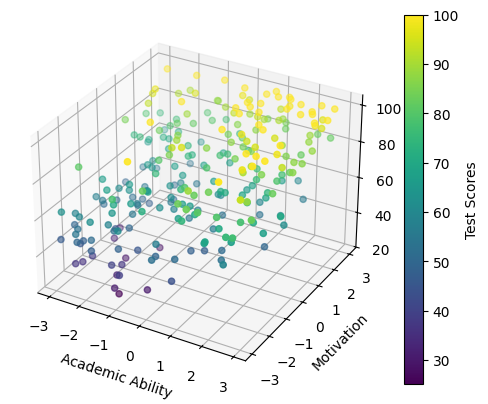

In [12]:
### Visualize Structural Equation Model
# Plot the SEM model with different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for different attributes
scatter = ax.scatter(
    df['Academic_Ability'],
    df['Motivation'],
    df['Test_Scores'],
    c=df['Test_Scores'],  # Use Test_Scores as a color indicator
    cmap='viridis',  # Choose a color map
    label='Test Scores'
)

ax.set_xlabel('Academic Ability')
ax.set_ylabel('Motivation')
ax.set_zlabel('Test Scores')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Test Scores')
cbar.set_label('Test Scores')

plt.show()

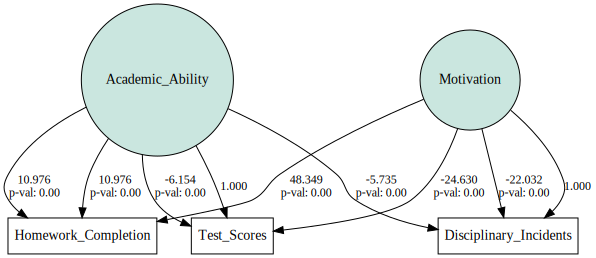

In [13]:
### Visualize Structural Equation Relationship Plot
# Generate SEM plot and save it to a file
semplot(model, "model.png")

*** Structural Equation Modelling (SEM) Using Python ~ Entire Code ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Academic_Ability        275 non-null    float64
 1   Motivation              275 non-null    float64
 2   Test_Scores             275 non-null    float64
 3   Homework_Completion     275 non-null    float64
 4   Disciplinary_Incidents  275 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.9 KB
Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.003
Number of iterations: 55
Params: 10.976 -6.154 -24.630 10.976 48.349 -5.735 -22.032 159.510 -41.413 0.774 504.893 10.754 350.169
                      lval  op                    rval    Estimate   Std. Err  \
0              Test_Scores   ~        Academic_Ability    1.000000          -   
1      Homework_Completion   ~        Academic_A

/usr/local/lib/python3.12/dist-packages/semopy/stats.py:383: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


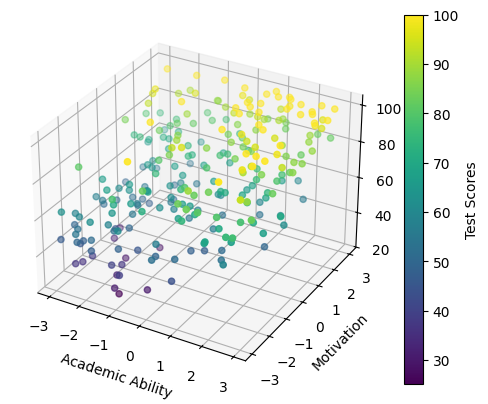

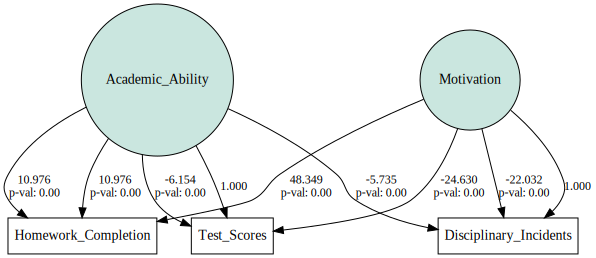

In [14]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## ! pip install semopy ### Switch on to install this

from semopy import Model, semplot, calc_stats  # Import calc_stats

### Load dataset
import pandas as pd
url= ("https://raw.githubusercontent.com/KenDaupsey/Structural-Equation-Modelling-SEM-Using-Python/main/StructuralEquationData.csv")
df= pd.read_csv(url)
df.head()

df.columns

df.info()

df.describe().T

# Define the SEM model
model_desc = '''
# Measurement model
Academic_Ability =~ Test_Scores + Homework_Completion
Motivation =~ Disciplinary_Incidents

# Structural model
Test_Scores ~ Academic_Ability + Motivation
Homework_Completion ~ Academic_Ability + Motivation
Disciplinary_Incidents ~ Academic_Ability + Motivation
'''

# Fit the SEM model
model = Model(model_desc)
sem_results = model.fit(df)  # Replace df with your actual DataFrame

# Print the summary of the SEM model
print(sem_results)

# Analyze parameter estimates
ins = model.inspect()
print(ins)

# Calculate additional SEM statistics
stats = calc_stats(model)  # Use calc_stats directly
print(stats)

### Visualize Structural Equation Model
# Plot the SEM model with different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for different attributes
scatter = ax.scatter(
    df['Academic_Ability'],
    df['Motivation'],
    df['Test_Scores'],
    c=df['Test_Scores'],  # Use Test_Scores as a color indicator
    cmap='viridis',  # Choose a color map
    label='Test Scores'
)

ax.set_xlabel('Academic Ability')
ax.set_ylabel('Motivation')
ax.set_zlabel('Test Scores')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Test Scores')
cbar.set_label('Test Scores')

plt.show()

### Visualize Structural Equation Relationship Plot
# Generate SEM plot and save it to a file
semplot(model, "model.png")